## Dragonfly Data Science 

* **Author:** Chad Karannagoda
* **Date:** 14/03/2020
* **Purpose:**  Below shown attempt is to show my technical knowledge, coding ability, problem solving skills, and creativity  to secure a **Graduate Data Scientist position at Dragonfly Data Science**.

## 1 .Understand the problem
The data set for this project has been taken from [Kaggle's Housing Data Set Knowledge Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) This project aims at predicting house prices (residential) in Ames, Iowa, USA. 


## 2. Hypothesis Generation

In simple words,  creating a set of features which could influence the target variable given a confidence interval ( taken as 95% all the time). We can do this before looking at the data to avoid biased thoughts:

* Ho - There exists no impact of a particular feature on the dependent variable. 
* Ha - There exists a direct impact of a particular feature on the dependent variable.

Some factors which I can think of that directly influence house prices are the following:

* Area of House
* How old is the house
* Location of the house
* How close/far is the market
* Connectivity of house location with transport
* How many floors does the house have
* What material is used in the construction
* Water /Electricity availability



In [139]:
#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [140]:
#loading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [141]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data set comprises numeric, categorical, and ordinal variables.we can select the target variable as SalePrice.

In [142]:
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train data has 1460 rows and 81 columns
----------------------------
The test data has 1459 rows and 80 columns


In [143]:
#check missing values
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

Out of 81 features, 19 features have missing values. Let's check the percentage of missing values in these columns.

In [144]:
#missing value counts in each of these columns
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

We can infer that the variable PoolQC has 99.5% missing values followed by MiscFeature, Alley, and Fence. 

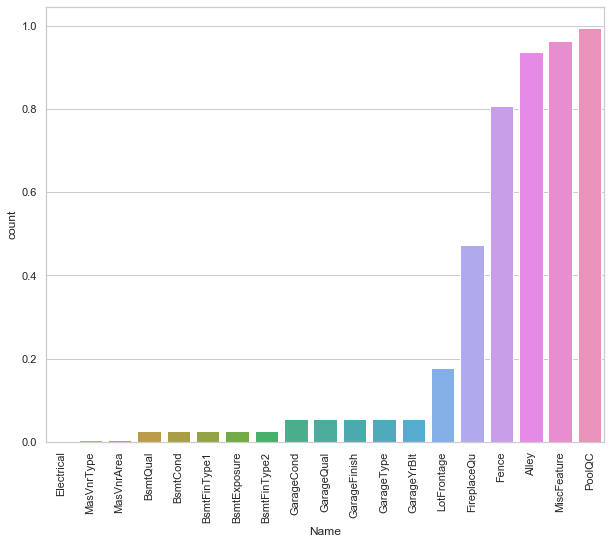

In [145]:
#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
#sns.plt.show()
plt.show()

Checking the distribution of the target variable.

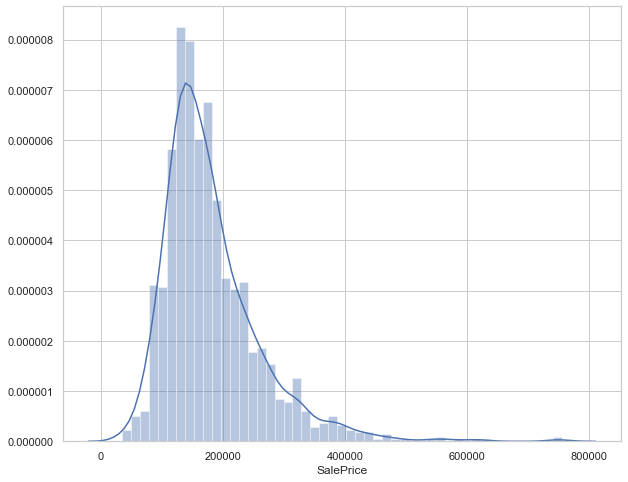

In [146]:
#SalePrice
sns.distplot(train['SalePrice'])

We can see that the target variable SalePrice has a **right-skewed distribution**. We'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. In addition, linear algorithms assume constant variance in the error term. Alternatively, we can also confirm this skewed behavior using the skewness metric as below;

In [147]:
#skewness
print ("The skewness of SalePrice is {}".format(train['SalePrice'].skew()))

The skewness of SalePrice is 1.8828757597682129


Skewness is 0.12133506220520406


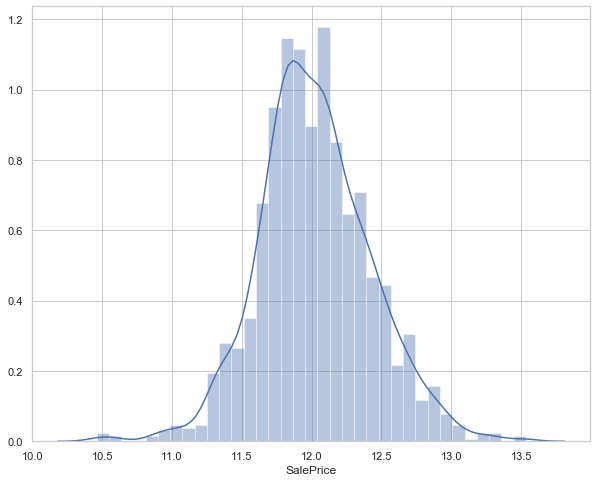

In [148]:
 #by graphing  log transform this  variable and see if this variable distribution can get any closer to normal.
target = np.log(train['SalePrice'])
print ('Skewness is', target.skew())
sns.distplot(target)

As we see, log transformation of the target variable has helped us fixing its skewed distribution and the new distribution looks closer to normal. Since we have 80 variables, visualizing one by one wouldn't be an good approach. Instead, we can look at some variables based on their correlation with the target variable.Moving forward, we can separate numeric and categorical variables and explore this data from a different angle.

In [149]:
#separate variables into new data frames
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 38 numeric and 43 categorical columns in train data


## 3. Exploring Numerical Data

In [150]:
#We should remove the Id variable from numeric data.
del numeric_data['Id']

Now, we can explore about the correlation behavior of numeric variables. Out of 38 variables, we presume some of them must be correlated. If found, we can later remove these correlated variables as they won't provide any useful information to the model.

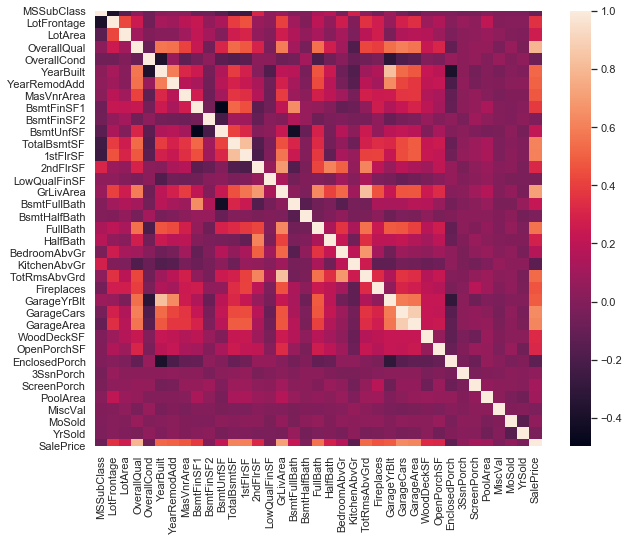

In [151]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

Notice the last row of this map. We can see the correlation of all variables against SalePrice. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [152]:
print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['SalePrice'].sort_values(ascending=False)[-5:]) #last 5 values`

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

----------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Here we see that the OverallQual feature is 79% correlated with the target variable. Overallqual feature refers to the overall material and quality of the materials of the completed house.(People usually consider these parameters for their dream house) In addition, GrLivArea is 70% correlated with the target variable. GrLivArea refers to the living area (in sq ft.) above ground. The following variables show people also care about if the house has a garage, the area of that garage, the size of the basement area etc..

In [153]:
#check the OverallQual variable in detail.
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

The overall quality is measured on a scale of 1 to 10. Hence, we can fairly treat it as an ordinal variable. 
Now We can check the median sale price of houses with respect to OverallQual. “Why median ?” ,because the target variable is skewed. A skewed variable has outliers and median is robust to outliers.

In [154]:
#let's check the mean price per quality and plot it.
pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
#pivot.sort_values(inplace=True)
pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


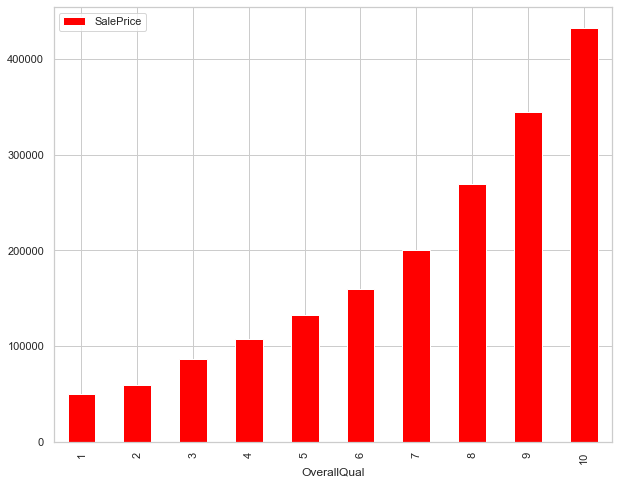

In [155]:
#Visuulse this to better understanding 
pivot.plot(kind='bar', color='red')

As the overall quality of a house increases, its sale price also increases. 


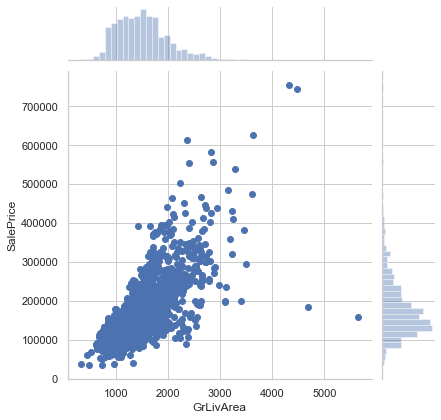

In [156]:
#Let's visualize the next correlated variable GrLivArea and understand their behavior.
#GrLivArea variable
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'])

As seen above, here also we see a direct correlation of living area with sale price. However, we can spot an outlier value GrLivArea > 500000.

## 4. Exploring Categorical Data

In [157]:
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


Let's check the median sale price of a house based on its SaleCondition. SaleCondition explains the condition of sale. Not much information is given about its categories.

In [158]:
sp_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
sp_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,244600


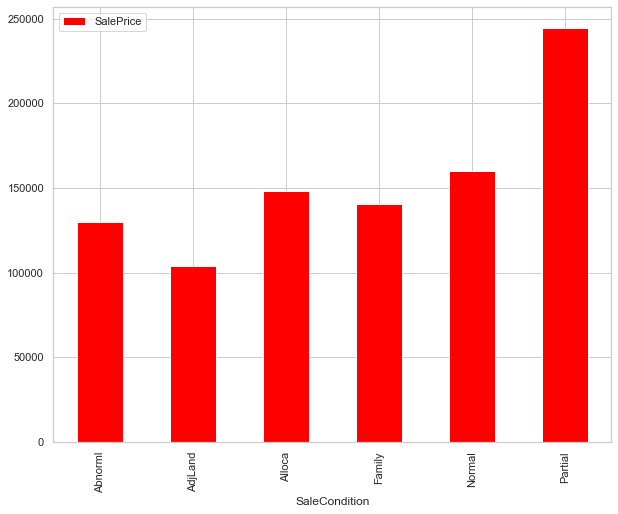

In [159]:
sp_pivot.plot(kind='bar',color='red')

We see that SaleCondition Partial has the highest mean sale price. Though, due to lack of information we can't generate many insights from this data. 

To get a quick glimpse of all variables in a data set, let's plot histograms for all numeric variables to determine if all variables are skewed. For categorical variables, we'll create a boxplot and understand their nature


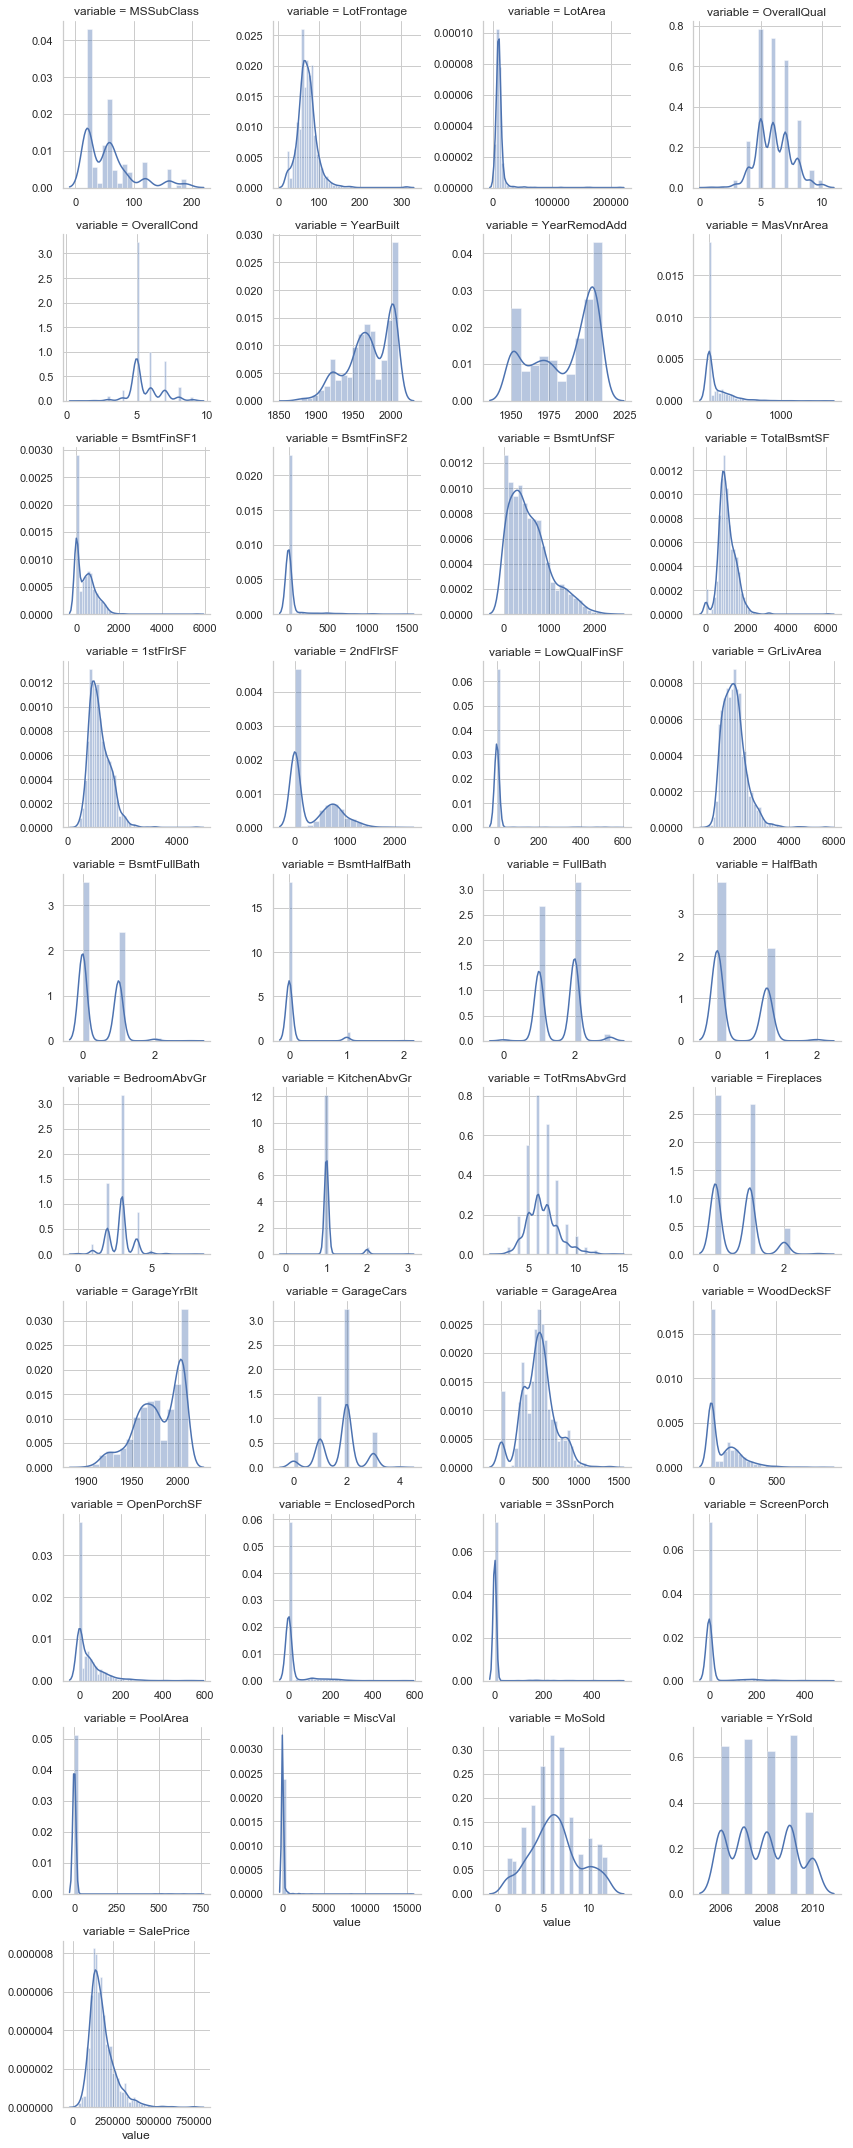

In [160]:
#create numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

As We can see, most of the variables are right skewed. . Now, let's create boxplots for visualizing categorical variables.

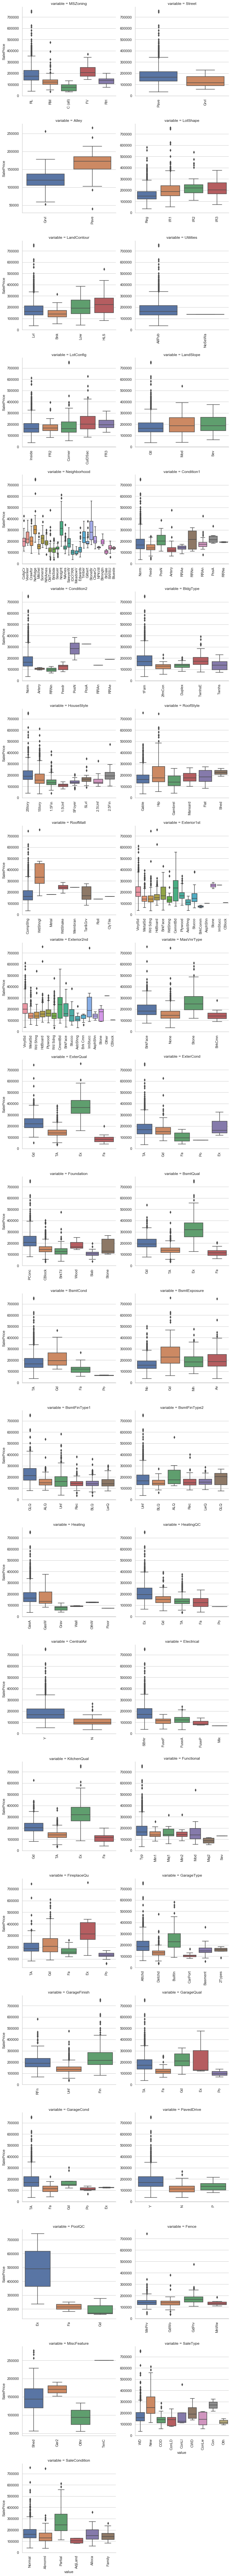

In [161]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, 'value','SalePrice')
g

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, we can leave them or  let algorithm to deal with them. 

This project is still progressing.To sucesss this project next valid step can be;

* **Data Preprocessing:** We can impute missing values and clean string variables (remove space, irregular tabs, data time format) and anything that shouldn't be there. This step is usually followed along with the data exploration stage. 
* **Feature Engineering:** We can create and add new features to the data set. Most of the ideas for these features come during the hypothesis generation stage.
* **Model Training:** Using a suitable algorithm, We can train the model on the given data set.
* **Model Evaluation:** Once the model is trained, we can evaluate the model's performance using a suitable error metric. 
    Here, we also can look for variable importance, i.e., which variables have proved to be significant in determining the target variable. And, accordingly we can shortlist the best variables and train the model again. 
* **Model Testing:** Finally, we can test the model on the unseen data (test data) set.

### Reference:
   1. https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion
   2. https://www.codespeedy.com/how-to-find-skewness-of-data-using-python/
   3. https://seaborn.pydata.org/tutorial/categorical.html
   4. https://stackoverflow.com/questions/37083954/difficulty-displaying-histogram-for-every-variable
   5. https://mode.com/python-tutorial/python-histograms-boxplots-and-distributions/
   6. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
   7. https://xgboost.readthedocs.io/en/latest/build.html